# Import Libraries

In [228]:
import pandas as pd
import numpy as np
import random
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import os
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Extracting data

In [229]:
data=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\Etibar M\SPAM text message 20170820 - Data.csv')

In [230]:
def check(X):
    print(data.isnull().sum())
    print(data.describe())

check(data)

Category    0
Message     0
dtype: int64
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [231]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's encode category to creating new column

In [232]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['number']=encoder.fit_transform(data['Category'])

In [233]:
data.head()

,Category,Message,number
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [234]:
data.duplicated().sum()

415

In [ ]:
let's drop duplicated 

In [235]:
data=data.drop_duplicates(keep='first')

In [236]:
data.duplicated().sum()

0

In [237]:
data.shape

(5157, 3)

In [238]:
data['length']=data['Message'].apply(len)

In [239]:
data.head()

,Category,Message,number,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Let's visualize

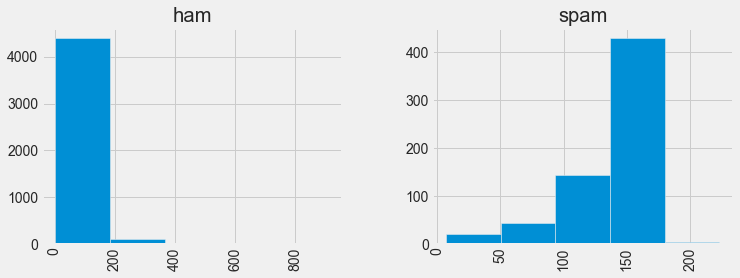

In [240]:
data.hist(column = 'length', by ='Category',figsize=(12,4), bins = 5)
plt.show()

In [241]:
data['no_of_words'] = data['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
data['no_of_sents'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [242]:
data.head()

,Category,Message,number,length,no_of_words,no_of_sents
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


creating dataframe

In [243]:
temp = pd.DataFrame()
temp['Category'] = ['Ham','Spam']
temp['Count'] = [len(data[data['Category'] == 'ham']), len(data[data['Category'] == 'spam'])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'Category', y = 'Count', 
             color = "Category", text_auto='', width = 600, 
             color_discrete_sequence = ["#AB63FA", "orange"],
             template = 'plotly_dark',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

In [244]:
fig = px.pie(temp, values = 'Count', names = 'Category', width = 600, 
             color = 'Category', color_discrete_map = {'Ham': 'rgb(166, 216, 84)', 'Spam': 'rgb(228, 26, 28)'},
             template = 'plotly_dark', title = "Pie Chart")
fig.show()

In [245]:
fig = px.histogram(data, x = 'length', color = 'Category', 
                   template = 'plotly_dark', 
                   title = "Histogram for HAM vs SPAM based on Number of Characters per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [246]:
fig = px.histogram(data, x = 'no_of_sents', color = 'Category', template = 'plotly_dark', title = "Histogram for HAM vs SPAM based on Number of Sentences per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [247]:
fig = px.scatter_matrix(data, dimensions=["length", "no_of_words", "no_of_sents"], 
                        color = "Category", template = 'plotly_dark', 
                        color_discrete_map = {'ham': '#19D3F3', 'spam': '#FF9900'},
                        title = "Pair Plot")
fig.show() 

In [248]:
fig = px.imshow(data.corr(), text_auto = True, color_continuous_scale = 'blues', template = 'plotly_dark', title = "Correlation Matrix")
fig.show()

In [249]:
def word_count_plot(data, title):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(25)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    fig = px.bar(most_count, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

In [250]:
word_count_plot(data["Message"], "Word Count Plot Before Stemming")

In [251]:
def text_process(mess):
 
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [252]:
data['Message'].head(5).apply(text_process)

0    Go jurong point crazy Available bugis n great ...
1                                Ok lar Joking wif oni
2    Free entry wkly comp win FA Cup final tkts 21s...
3                      dun say early hor c already say
4               Nah think goes usf lives around though
Name: Message, dtype: object

In [253]:
data['clean'] = data.Message.apply(text_process)

In [254]:
data.head()

,Category,Message,number,length,no_of_words,no_of_sents,clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,Nah think goes usf lives around though


In [255]:
spam_corpus=[]

for msg in data[data['Category'] == 'spam']['clean'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

temp=pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['Word', 'Count'])

fig = px.bar(temp, x = 'Word', y = 'Count', color = "Count", template = 'plotly_dark', title = 'Count Plot for Cleaned Spam Words')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False, showticklabels = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

In [256]:
X=data.clean
y=data.number


In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3867,)
(1290,)
(3867,)
(1290,)


In [258]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [259]:
X_train_dtm= vect.transform(X_train)

In [260]:
X_train_dtm = vect.fit_transform(X_train)

In [261]:
X_train_dtm

<3867x7846 sparse matrix of type '<class 'numpy.int64'>'
	with 31643 stored elements in Compressed Sparse Row format>

In [262]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1290x7846 sparse matrix of type '<class 'numpy.int64'>'
	with 8956 stored elements in Compressed Sparse Row format>

In [263]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<3867x7846 sparse matrix of type '<class 'numpy.float64'>'
	with 31643 stored elements in Compressed Sparse Row format>

In [264]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [265]:
det_model=nb.fit(X_train_dtm, y_train)

In [266]:
y_pred_class = nb.predict(X_test_dtm)

In [267]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9751937984496124

# TFIDF

In [268]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['clean']).toarray()
Y = data['number'].values

In [269]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3609, 9428) (1548, 9428) (4125,) (1032,)


In [270]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
nb = MultinomialNB()
bnb=BernoulliNB()

In [271]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

              precision    recall  f1-score   support

         Ham       0.95      1.00      0.98       904
        Spam       1.00      0.65      0.79       128

    accuracy                           0.96      1032
   macro avg       0.98      0.82      0.88      1032
weighted avg       0.96      0.96      0.95      1032



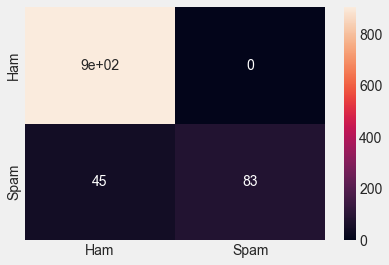

In [272]:
from sklearn.metrics import classification_report
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test,y_pred_mnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.show()

              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98       904
        Spam       0.94      0.80      0.86       128

    accuracy                           0.97      1032
   macro avg       0.95      0.89      0.92      1032
weighted avg       0.97      0.97      0.97      1032



<AxesSubplot:>

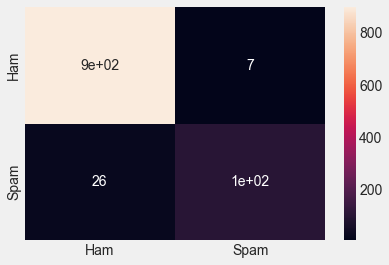

In [273]:

bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test,y_pred_bnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])

In [274]:
y_pred=nb.predict(X_test)

In [275]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9563953488372093